In [1]:
import pandas as pd
import os

In [2]:
mws = "../data/newsela"

print("Read Newsela article sentences dataset:")

fp_train_src = 'train.src'
fp_train_src = os.path.join(mws, fp_train_src)
df_train_src = pd.read_csv(fp_train_src, header=None, sep='\n')
df_train_src.columns = ["sentence"]

fp_train_dst = 'train.dst'
fp_train_dst = os.path.join(mws, fp_train_dst)
df_train_dst = pd.read_csv(fp_train_dst, header=None, sep='\n')
df_train_dst.columns = ["sentence"]

fp_valid_src = 'valid.src'
fp_valid_src = os.path.join(mws, fp_valid_src)
df_valid_src = pd.read_csv(fp_valid_src, header=None, sep='\n')
df_valid_src.columns = ["sentence"]

fp_valid_dst = 'valid.dst'
fp_valid_dst = os.path.join(mws, fp_valid_dst)
df_valid_dst = pd.read_csv(fp_valid_dst, header=None, sep='\n')
df_valid_dst.columns = ["sentence"]

fp_test_src = 'test.src'
fp_test_src = os.path.join(mws, fp_test_src)
df_test_src = pd.read_csv(fp_test_src, header=None, sep='\n')
df_test_src.columns = ["sentence"]

fp_test_dst = 'test.dst'
fp_test_dst = os.path.join(mws, fp_test_dst)
df_test_dst = pd.read_csv(fp_test_dst, header=None, sep='\n')
df_test_dst.columns = ["sentence"]

print("loaded..........")

Read Newsela article sentences dataset:
loaded..........


In [3]:
print("Amount of sentences:")
print("....................")
print("df_train_src:", len(df_train_src))
print("df_train_dst:", len(df_train_dst))
print("df_valid_src:", len(df_valid_src))
print("df_valid_dst:", len(df_valid_dst))
print("df_test_src:", len(df_test_src))
print("df_test_dst:", len(df_test_dst))

Amount of sentences:
....................
df_train_src: 94208
df_train_dst: 94208
df_valid_src: 1129
df_valid_dst: 1129
df_test_src: 1077
df_test_dst: 1077


In [ ]:
from transformers import BertTokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

In [ ]:
import spacy
spacy_en = spacy.load('en')

def tokenize_en(text):
    return [tok.text for tok in spacy_en.tokenizer(text)]

In [80]:
print("Tokenize in WordPiece")

x1 = df_train_src["sentence"].map(lambda x: bert_tokenizer.tokenize(x))
x2 = df_train_dst["sentence"].map(lambda x: bert_tokenizer.tokenize(x))
x3 = df_valid_src["sentence"].map(lambda x: bert_tokenizer.tokenize(x))
x4 = df_valid_dst["sentence"].map(lambda x: bert_tokenizer.tokenize(x))
x5 = df_test_src["sentence"].map(lambda x: bert_tokenizer.tokenize(x))
x6 = df_test_dst["sentence"].map(lambda x: bert_tokenizer.tokenize(x))

x1_len = x1.map(lambda x: len(x))
x2_len = x2.map(lambda x: len(x))
x3_len = x3.map(lambda x: len(x))
x4_len = x4.map(lambda x: len(x))
x5_len = x5.map(lambda x: len(x))
x6_len = x6.map(lambda x: len(x))

print("tokenized....................")

Tokenize in WordPiece
tokenized....................


In [81]:
print("Tokenize in Words")

w1 = df_train_src["sentence"].map(lambda w: tokenize_en(w))
w2 = df_train_dst["sentence"].map(lambda w: tokenize_en(w))
w3 = df_valid_src["sentence"].map(lambda w: tokenize_en(w))
w4 = df_valid_dst["sentence"].map(lambda w: tokenize_en(w))
w5 = df_test_src["sentence"].map(lambda w: tokenize_en(w))
w6 = df_test_dst["sentence"].map(lambda w: tokenize_en(w))

w1_len = w1.map(lambda w: len(w))
w2_len = w2.map(lambda w: len(w))
w3_len = w3.map(lambda w: len(w))
w4_len = w4.map(lambda w: len(w))
w5_len = w5.map(lambda w: len(w))
w6_len = w6.map(lambda w: len(w))

print("tokenized....................")

Tokenize in Words
tokenized....................


In [82]:
print("Analyse")

df_src_x = pd.concat([x1_len, x3_len, x5_len])
df_dst_x = pd.concat([x2_len, x4_len, x6_len])

df_src_w = pd.concat([w1_len, w3_len, w5_len])
df_dst_w = pd.concat([w2_len, w4_len, w6_len])

df_src_x_99 = df_src_x[df_src_x < df_src_x.quantile(.99)]
df_dst_x_99 = df_dst_x[df_dst_x < df_dst_x.quantile(.99)]

df_src_w_99 = df_src_w[df_src_w < df_src_w.quantile(.99)]
df_dst_w_99 = df_dst_w[df_dst_w < df_dst_w.quantile(.99)]

max_df_src_x = df_src_x.max()
quantile_75_df_src_x = df_src_x.quantile(.75)
quantile_99_df_src_x = df_src_x.quantile(.99)
mean_df_src_x = df_src_x_99.mean()

max_df_src_w = df_src_w_99.max()
quantile_75_df_src_w = df_src_w_99.quantile(.75)
quantile_99_df_src_w = df_src_w_99.quantile(.99)
mean_df_src_w = df_src_w_99.mean()

max_df_dst_x = df_dst_x.max()
quantile_75_df_dst_x = df_dst_x.quantile(.75)
quantile_99_df_dst_x = df_dst_x.quantile(.99)
mean_df_dst_x = df_dst_x_99.mean()

max_df_dst_w = df_src_w_99.max()
quantile_75_df_dst_w = df_dst_w_99.quantile(.75)
quantile_99_df_dst_w = df_dst_w_99.quantile(.99)
mean_df_dst_w = df_dst_w_99.mean()

print("analysed....................")

Analyse
analysed....................


In [83]:
print("SRC Wordpiece....................")
print("max_df_src_x:", max_df_src_x)
print("quantile_75_df_src_x:", quantile_75_df_src_x)
print("quantile_99_df_src_x:", quantile_99_df_src_x)
print("mean_df_src_x:", mean_df_src_x)

print("SRC Word....................")
print("max_df_src_w:", max_df_src_w)
print("quantile_75_df_src_w:", quantile_75_df_src_w)
print("quantile_99_df_src_w:", quantile_99_df_src_w)
print("mean_df_src_w:", mean_df_src_w)
print("\n")
print("DST Wordpiece....................")
print("max_df_dst_x:", max_df_dst_x)
print("quantile_75_df_dst_x:", quantile_75_df_dst_x)
print("quantile_99_df_dst_x:", quantile_99_df_dst_x)
print("mean_df_dst_x:", mean_df_dst_x)

print("DST Word....................")
print("max_df_dst_w:", max_df_dst_w)
print("quantile_75_df_dst_w:", quantile_75_df_dst_w)
print("quantile_99_df_dst_w:", quantile_99_df_dst_w)
print("mean_df_dst_w:", mean_df_dst_w)

SRC Wordpiece....................
max_df_src_x: 150
quantile_75_df_src_x: 38.0
quantile_99_df_src_x: 70.0
mean_df_src_x: 29.577514383626244
SRC Word....................
max_df_src_w: 58
quantile_75_df_src_w: 33.0
quantile_99_df_src_w: 54.0
mean_df_src_w: 25.968309527053226


DST Wordpiece....................
max_df_dst_x: 84
quantile_75_df_dst_x: 22.0
quantile_99_df_dst_x: 41.0
mean_df_dst_x: 17.5788943563702
DST Word....................
max_df_dst_w: 58
quantile_75_df_dst_w: 19.0
quantile_99_df_dst_w: 32.0
mean_df_dst_w: 15.764741698772793


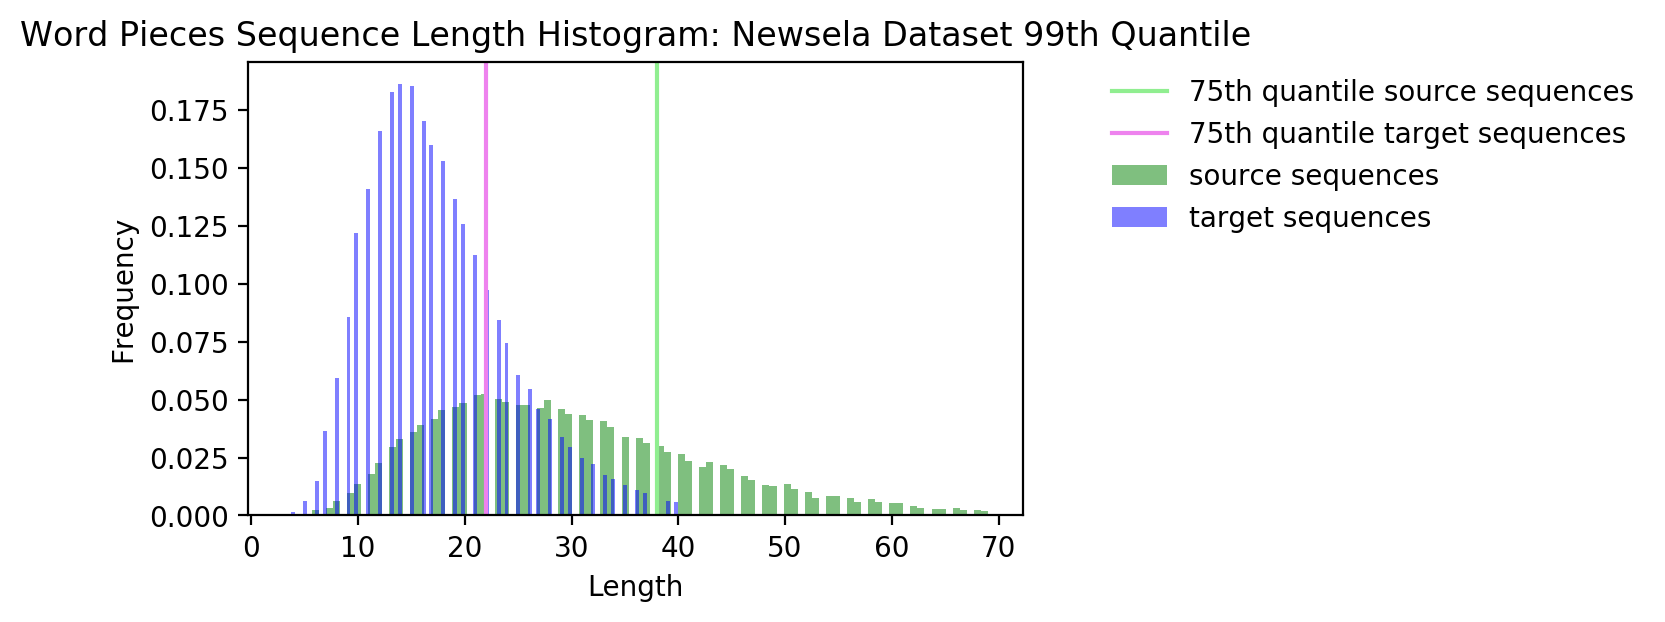

In [87]:
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':200})
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

# Plot Histogram on x
plt.axvline(x=quantile_75_df_src_x,color='lightgreen', label='75th quantile source sequences')
plt.axvline(x=quantile_75_df_dst_x,color='violet', label='75th quantile target sequences')
plt.hist(df_src_x_99, **kwargs, color='g', label='source sequences')
plt.hist(df_dst_x_99, **kwargs, color='b', label='target sequences')
plt.gca().set(title='Word Pieces Sequence Length Histogram: Newsela Dataset 99th Quantile', ylabel='Frequency', xlabel="Length");
plt.legend(loc='lower left', bbox_to_anchor= (1.1, 0.6), ncol=1,
            borderaxespad=0, frameon=False)

In [53]:
# merge tokenized sentences Wordpiece
df_src_x_tok = pd.concat([x1, x3, x5])
df_dst_x_tok = pd.concat([x2, x4, x6])

frame = { 'src': df_src_x_tok, 'dst': df_dst_x_tok } 
df_src_dst_tok = pd.DataFrame(frame) 

print("Amount of src/dst", len(df_src_dst_tok))

Amount of src/dst 96414


In [54]:
# merge tokenized sentences Words
df_src_w_tok = pd.concat([w1, w3, w5])
df_dst_w_tok = pd.concat([w2, w4, w6])

frame = { 'src': df_src_w_tok, 'dst': df_dst_w_tok } 
df_src_dst_w_tok = pd.DataFrame(frame) 

print("Amount of src/dst", len(df_src_dst_w_tok))

Amount of src/dst 96414


In [55]:
# remove sentence pairs with over .99 percentile length from WordPiece
print("quantile_99_df_src_x", quantile_99_df_src_x)
print("quantile_99_df_dst_x", quantile_99_df_dst_x)

index_drop = []
for index, row in df_src_dst_tok.iterrows():
    if len(row.src) > quantile_99_df_src_x and len(row.dst) > quantile_99_df_dst_x:
        index_drop.append(index)
print(index_drop)
print(len(df_src_dst_tok))
df_src_dst_tok = df_src_dst_tok.drop(df_src_dst_tok.index[index_drop])
print(len(df_src_dst_tok))

quantile_99_df_src_x 70.0
quantile_99_df_dst_x 41.0
[75323, 80965, 82524, 82848, 82853, 82855, 84516, 84533, 86179, 86186, 89164, 89860, 89922, 90186, 90725, 90727, 90755, 91640, 91878, 91898, 91942, 92183, 92266, 92472, 92542, 92547, 92550, 92652, 92756, 92857, 92941, 92969, 92977, 93055, 93108, 93136, 93139, 93270, 93274, 93361, 93366, 93376, 93452, 93460, 93464, 93529, 93553, 93595, 93610, 93696, 93715, 93727, 93855, 93870, 93883, 93889, 93905, 93906, 93927, 93997, 94023, 94047, 94065, 94069, 94075, 94084, 94096, 94097, 94117, 94118, 94120, 94133, 94152, 94167, 94181, 94182, 94199, 94203, 94207]
96414
96335


In [56]:
print(len(df_src_dst_w_tok))
df_src_dst_w_tok = df_src_dst_w_tok.drop(df_src_dst_w_tok.index[index_drop])
print(len(df_src_dst_w_tok))

96414
96335


In [57]:
# remove sentence pairs with over .99 percentile length from WordPiece for single sets
print("quantile_99_df_src_x", quantile_99_df_src_x)
print("quantile_99_df_dst_x", quantile_99_df_dst_x)

# merge tokenized sentences Wordpiece
frame_train = { 'src': x1, 'dst': x2 } 
df_src_dst_train = pd.DataFrame(frame_train) 

frame_valid = { 'src': x3, 'dst': x4 } 
df_src_dst_valid = pd.DataFrame(frame_valid) 

frame_test = { 'src': x5, 'dst': x6 } 
df_src_dst_test = pd.DataFrame(frame_test)

index_drop = []
for index, row in df_src_dst_train.iterrows():
    if len(row.src) > quantile_99_df_src_x and len(row.dst) > quantile_99_df_dst_x:
        index_drop.append(index)
print(index_drop)
print(len(df_src_dst_train))
df_src_dst_train = df_src_dst_train.drop(df_src_dst_train.index[index_drop])
print(len(df_src_dst_train))

index_drop = []
for index, row in df_src_dst_valid.iterrows():
    if len(row.src) > quantile_99_df_src_x and len(row.dst) > quantile_99_df_dst_x:
        index_drop.append(index)
print(index_drop)
print(len(df_src_dst_valid))
df_src_dst_valid = df_src_dst_valid.drop(df_src_dst_valid.index[index_drop])
print(len(df_src_dst_valid))

index_drop = []
for index, row in df_src_dst_test.iterrows():
    if len(row.src) > quantile_99_df_src_x and len(row.dst) > quantile_99_df_dst_x:
        index_drop.append(index)
print(index_drop)
print(len(df_src_dst_test))
df_src_dst_test = df_src_dst_test.drop(df_src_dst_test.index[index_drop])
print(len(df_src_dst_test))

quantile_99_df_src_x 70.0
quantile_99_df_dst_x 41.0
[75323, 80965, 82524, 82848, 82853, 82855, 84516, 84533, 86179, 86186, 89164, 89860, 89922, 90186, 90725, 90727, 90755, 91640, 91878, 91898, 91942, 92183, 92266, 92472, 92542, 92547, 92550, 92652, 92756, 92857, 92941, 92969, 92977, 93055, 93108, 93136, 93139, 93270, 93274, 93361, 93366, 93376, 93452, 93460, 93464, 93529, 93553, 93595, 93610, 93696, 93715, 93727, 93855, 93870, 93883, 93889, 93905, 93906, 93927, 93997, 94023, 94047, 94065, 94069, 94075, 94084, 94096, 94097, 94117, 94118, 94120, 94133, 94152, 94167, 94181, 94182, 94199, 94203, 94207]
94208
94129
[]
1129
1129
[]
1077
1077


In [58]:
print("Build Vocab of WordPiece")

# Create an empty dictionary 
src = dict()
dst = dict()

def sentence_count(sent, d):
    for word in sent: 
        if word in d:
            d[word] = d[word] + 1
        else: 
            d[word] = 1

df_src_x_99 = df_src_dst_tok.src
df_dst_x_99 = df_src_dst_tok.dst

print(len(df_src_x_99))
print(len(df_dst_x_99))

df_src_x_99.map(lambda x: sentence_count(x, src))
df_dst_x_99.map(lambda x: sentence_count(x, dst))
  
# Merge Dicts
merged = {**src, **dst}

print("built....................")

print("Size of SRC-Vocab:", len(src))
print("Size of DST-Vocab:", len(dst))
print("Size of merged Vocab:", len(merged))

Build Vocab of WordPiece
96335
96335
built....................
Size of SRC-Vocab: 22100
Size of DST-Vocab: 19344
Size of merged Vocab: 22264


In [66]:
print("Build Vocab of Words")

# Create an empty dictionary 
src_w = dict()
dst_w = dict()

def sentence_count(sent, d):
    for word in sent: 
        if word in d:
            d[word] = d[word] + 1
        else: 
            d[word] = 1

df_src_w_99 = df_src_dst_w_tok.src
df_dst_w_99 = df_src_dst_w_tok.dst

print(len(df_src_w_99))
print(len(df_dst_w_99))

df_src_w_99.map(lambda w: sentence_count(w, src_w))
df_dst_w_99.map(lambda w: sentence_count(w, dst_w))
  
# Merge Dicts
merged_w = {**src_w, **dst_w}

print("built....................")

print("Size of SRC-Vocab:", len(src_w))
print("Size of DST-Vocab:", len(dst_w))
print("Size of merged Vocab:", len(merged_w))

Build Vocab of Words
96335
96335
built....................
Size of SRC-Vocab: 38361
Size of DST-Vocab: 28518
Size of merged Vocab: 39327


In [67]:
print("Analyse Vocab")

v_merged_data = list(merged.values())
v_df_merged_x = pd.DataFrame(v_merged_data) 

v_merged_w_data = list(merged_w.values())
v_df_merged_w = pd.DataFrame(v_merged_w_data) 


max_df_merged_x = v_df_merged_x.max()
quantile_75_df_merged_x = v_df_merged_x.quantile(.75)
mean_df_merged_x = v_df_merged_x.mean()

max_df_merged_w = v_df_merged_w.max()
quantile_75_df_merged_w = v_df_merged_w.quantile(.75)
mean_df_merged_w = v_df_merged_w.mean()

print("analysed....................")

Analyse Vocab
analysed....................


In [68]:
print("Analyse Vocab")

v_merged_data = list(merged.values())
v_df_merged_x = pd.DataFrame(v_merged_data) 

v_merged_w_data = list(merged_w.values())
v_df_merged_w = pd.DataFrame(v_merged_w_data) 


max_df_merged_x = v_df_merged_x.max()
quantile_75_df_merged_x = v_df_merged_x.quantile(.75)
mean_df_merged_x = v_df_merged_x.mean()

max_df_merged_w = v_df_merged_w.max()
quantile_75_df_merged_w = v_df_merged_w.quantile(.75)
mean_df_merged_w = v_df_merged_w.mean()

print("analysed....................")

Analyse Vocab
analysed....................


In [69]:
print("WordPiece Vocab..............")
print("max_df_merged_x", max_df_merged_x)
print("quantile_75_df_merged_x", quantile_75_df_merged_x)
print("mean_df_merged_x", mean_df_merged_x)

print("Word Vocab..............")
print("max_df_merged_w", max_df_merged_w)
print("quantile_75_df_merged_w", quantile_75_df_merged_w)
print("mean_df_merged_w", mean_df_merged_w)

WordPiece Vocab..............
max_df_merged_x 0    105415
dtype: int64
quantile_75_df_merged_x 0    29.0
Name: 0.75, dtype: float64
mean_df_merged_x 0    78.237199
dtype: float64
Word Vocab..............
max_df_merged_w 0    96814
dtype: int64
quantile_75_df_merged_w 0    10.0
Name: 0.75, dtype: float64
mean_df_merged_w 0    40.414372
dtype: float64


In [70]:
v_df_merged_x.sum()

0    1741873
dtype: int64

In [71]:
v_df_merged_w.sum()

0    1589376
dtype: int64

In [21]:
94208 - 94129

79

In [26]:
19344-28518

-9174